# HW 2: REGRESSION

HW here: https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/02-regression/homework.md

In [43]:
import pandas as pd


df = pd.read_csv('./housing.csv')

print("full dataset # of rows: ", len(df))
print(len(df.columns))

full dataset # of rows:  20640
10


In [42]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Objective: Create a regression model for predicting housing prices (column 'median_house_value').

## PREPROCESSING

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'


In [44]:
cols = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]


df_filtered = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])][cols]

print("filtering for non-ocean properties: ", len(df_filtered))

filtering for non-ocean properties:  15687


In [35]:
df_filtered.head(10) 

# Note we now have 9 columns.

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
862,37.58,-121.99,31.0,2878.0,478.0,1276.0,485.0,6.2073,282500.0
863,37.58,-122.00,6.0,4405.0,717.0,2071.0,688.0,5.8151,295600.0
870,37.49,-121.93,5.0,1150.0,311.0,648.0,245.0,3.5714,300000.0
880,37.56,-121.99,18.0,5505.0,1005.0,2641.0,971.0,5.0000,269700.0
881,37.56,-121.99,20.0,6462.0,1294.0,3288.0,1235.0,4.3393,231200.0


In [5]:
df_filtered.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

## 0. Does the median_house_value have a long tail?



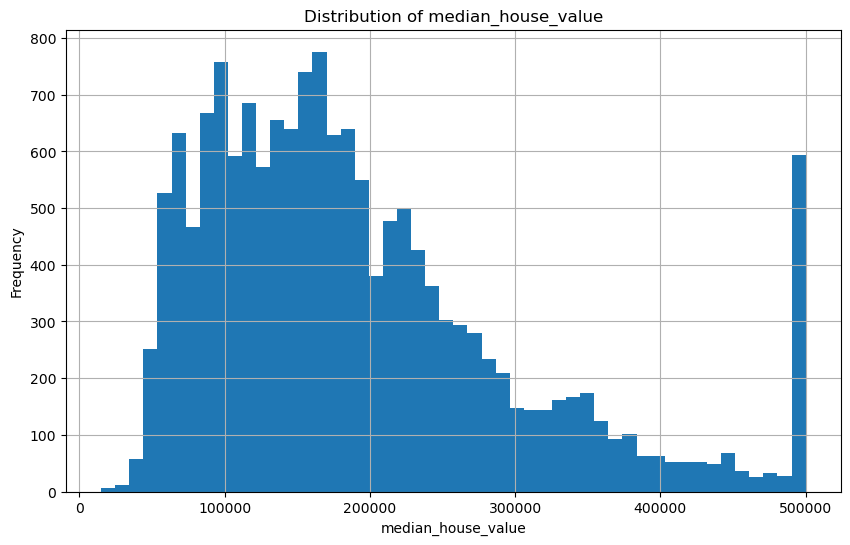

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
df_filtered['median_house_value'].hist(bins=50)
plt.title('Distribution of median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.show()


### 1. Which columns are missing data?

In [7]:
missing_data_columns = df_filtered.columns[df_filtered.isna().any()].tolist()

print(missing_data_columns)

['total_bedrooms']


### 2. What's the median (50% percentile) for variable 'population'?

In [8]:
print(df_filtered['population'].median())

1195.0


## SPLIT THE DATASET

    Shuffle the dataset (the filtered one you created above), use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [54]:
from sklearn.model_selection import train_test_split
import numpy as np


# 1. SHUFFLE DATA

df_shuffled = df_filtered.sample(frac=1, random_state=42)

# 2. SPLIT DATA

train, temp = train_test_split(df_shuffled, test_size=0.4, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

# 3. TRANSFORM DATA
train['median_house_value'] = np.log1p(train['median_house_value'])
val['median_house_value'] = np.log1p(val['median_house_value'])
test['median_house_value'] = np.log1p(test['median_house_value'])


In [55]:
train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16677,35.13,-120.66,41.0,2666.0,751.0,940.0,507.0,1.9653,12.372015
3158,35.26,-118.95,24.0,1341.0,214.0,667.0,184.0,4.0000,11.456366
2355,36.77,-119.68,21.0,1260.0,182.0,583.0,205.0,6.0132,11.923716
12879,38.65,-121.38,34.0,825.0,173.0,355.0,130.0,3.1858,11.603689
9526,39.13,-123.16,33.0,1320.0,303.0,1048.0,303.0,1.7813,11.458480


In [56]:
print(train['median_house_value'].min(), train['median_house_value'].max())

9.615805480084347 13.122367377396328


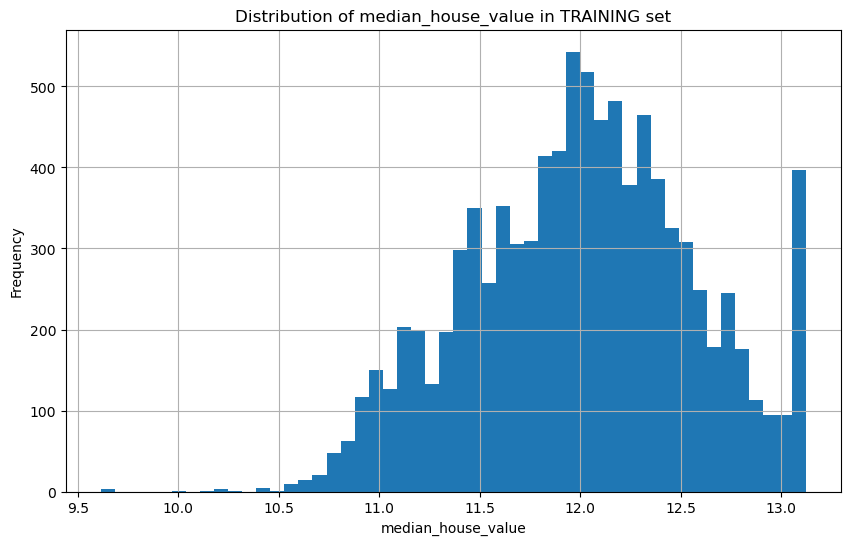

In [58]:
plt.figure(figsize=(10,6))
train['median_house_value'].hist(bins=50)
plt.title('Distribution of median_house_value in TRAINING set')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.show()

### 3. Imputing Values

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?
    
 ### Impute 0


In [63]:
train_data_zero_filled = train.drop(columns=['median_house_value']).copy()
train_data_zero_filled['total_bedrooms'].fillna(0, inplace=True)

#### Train the regression model on 0

In [83]:
from sklearn.linear_model import LinearRegression

model_0 = LinearRegression().fit(train_data_zero_filled, train['median_house_value'])

[12.32350736 11.97306401 12.12806655 ... 12.06568105 11.55007254
 11.79353528]


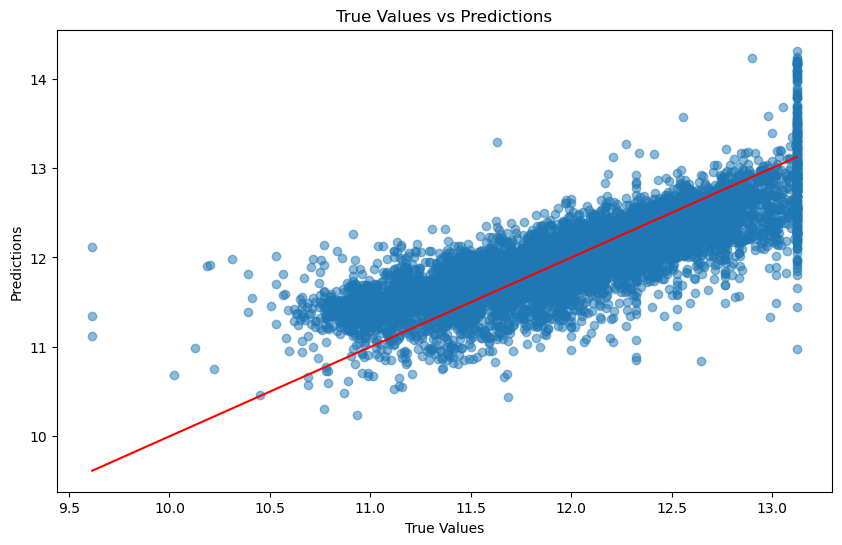

In [89]:
train_predictions = model_0.predict(train_data_zero_filled)

print(train_predictions)

plt.figure(figsize=(10, 6))
plt.scatter(train['median_house_value'], train_predictions, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.plot([min(train['median_house_value']), max(train['median_house_value'])], [min(train['median_house_value']), max(train['median_house_value'])], color='red') # y=x line
plt.show()

#### Evaluate the models using RMSE

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

val_data_zero_filled = val.drop(columns=['median_house_value']).copy()
val_data_zero_filled['total_bedrooms'].fillna(0, inplace=True)
val_predictions = model_0.predict(val_data_zero_filled)

mae = mean_absolute_error(val['median_house_value'], val_predictions)
mse = mean_squared_error(val['median_house_value'], val_predictions)
rmse = mean_squared_error(val['median_house_value'], val_predictions, squared=False)  # If squared=False, then it returns RMSE

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.35


### Now impute using mean

In [86]:
mean_value = train['total_bedrooms'].mean()
train_data_mean_filled = train.drop(columns=['median_house_value']).copy()
train_data_mean_filled['total_bedrooms'].fillna(mean_value, inplace=True)

model_MEAN = LinearRegression().fit(train_data_mean_filled, train['median_house_value'])

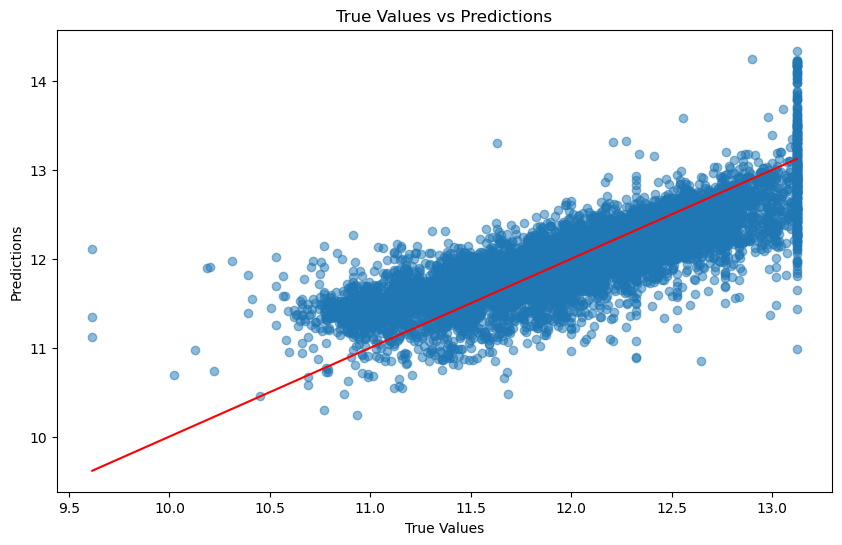

In [87]:
train_predictions = model_MEAN.predict(train_data_mean_filled)

plt.figure(figsize=(10, 6))
plt.scatter(train['median_house_value'], train_predictions, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.plot([min(train['median_house_value']), max(train['median_house_value'])], [min(train['median_house_value']), max(train['median_house_value'])], color='red') # y=x line
plt.show()

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

val_data_mean_filled = val.drop(columns=['median_house_value']).copy()
val_data_mean_filled['total_bedrooms'].fillna(0, inplace=True)
val_predictions = model_MEAN.predict(val_data_zero_filled)

mae = mean_absolute_error(val['median_house_value'], val_predictions)
mse = mean_squared_error(val['median_house_value'], val_predictions)
rmse = mean_squared_error(val['median_house_value'], val_predictions, squared=False)  # If squared=False, then it returns RMSE

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.35


### 4. Regularized Linear Regression 


    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

    0
    0.000001
    0.001
    0.0001


In [90]:
train_data_filled = train.copy()
train_data_filled['total_bedrooms'].fillna(0, inplace=True)

val_data_filled = val.copy()
val_data_filled['total_bedrooms'].fillna(0, inplace=True)


In [91]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_scores = {}

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(train_data_filled.drop(columns=['median_house_value']), train['median_house_value'])
    predictions = model.predict(val_data_filled.drop(columns=['median_house_value']))
    rmse = np.sqrt(mean_squared_error(val['median_house_value'], predictions))
    rmse_scores[r] = round(rmse, 2)


In [93]:
best_r = min(rmse_scores, key=rmse_scores.get)
print(best_r)

0


### 5. The effect of randomness


    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

    0.5
    0.05
    0.005
    0.0005


In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have loaded the dataset in df_filtered

rmse_scores = []

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seed_values:
    # Shuffle and split the data
    df_shuffled = df_filtered.sample(frac=1, random_state=seed)
    train, temp = train_test_split(df_shuffled, test_size=0.4, random_state=seed)
    val, test = train_test_split(temp, test_size=0.5, random_state=seed)

    # Fill missing values with 0 for training data
    train_filled = train.copy()
    train_filled['total_bedrooms'].fillna(0, inplace=True)
    
    # Fill missing values for validation data
    val_filled = val.copy()
    val_filled['total_bedrooms'].fillna(0, inplace=True)
    
    # Train a model without regularization
    model = LinearRegression().fit(train_filled.drop(columns=['median_house_value']), np.log1p(train['median_house_value']))
    
    # Predict on validation dataset
    val_predictions = model.predict(val_filled.drop(columns=['median_house_value']))
    
    # Calculate RMSE on the validation set (in log scale)
    rmse = np.sqrt(mean_squared_error(np.log1p(val['median_house_value']), val_predictions))
    rmse_scores.append(rmse)

# Compute standard deviation of RMSE scores
std_rmse = np.std(rmse_scores)

print(round(std_rmse, 4))


0.0058
